In [1]:
# The parameters that we decided determine what differentiates an "elongated" tubule from a "normal / round" tubule:

ar_critical_threshold = 2.3 
solidity_critical_threshold = 0.801 

In [2]:
# Python helpers: 
import os 
import numpy as np
import skimage 
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd

#Just change the directory where you're getting the files from:
directory = '/Users/keenanduggal/Desktop/Output/Cell_Line_U/'

final_directory = os.path.basename(os.path.normpath(directory))
filelist = os.listdir(directory)
name_list = []
for filename in filelist:
    if filename.endswith("Program.csv"):
        name_list.append(filename)
print(name_list)
print(final_directory)

['forNormalizationProgram.csv']
Cell_Line_U


In [3]:
# Csv into dataframes
data = pd.read_csv((directory + name_list[0])) 
labeldf = pd.DataFrame(data, columns= ['Label'])
ardf = pd.DataFrame(data, columns= ['AR'])
areadf = pd.DataFrame(data, columns= ['Area'])
perimdf = pd.DataFrame(data, columns= ['Perim.'])
circdf = pd.DataFrame(data, columns= ['Circ.'])
feretdf = pd.DataFrame(data, columns= ['Feret'])
rounddf = pd.DataFrame(data, columns= ['Round'])
soliditydf = pd.DataFrame(data, columns= ['Solidity'])
meandf = pd.DataFrame(data, columns= ['Mean'])
modedf = pd.DataFrame(data, columns= ['Mode'])
mindf = pd.DataFrame(data, columns= ['Min'])
maxdf = pd.DataFrame(data, columns= ['Max'])
indexdf = pd.DataFrame(data, columns= ['Index'])

In [4]:
# Data frames into arrays
indexArray = np.concatenate(indexdf.to_numpy(), axis=0, out=None)
labelArray = np.concatenate(labeldf.to_numpy(), axis=0, out=None)
arArray = np.concatenate(ardf.to_numpy(), axis=0, out=None)
areaArray = np.concatenate(areadf.to_numpy(), axis=0, out=None)
perimArray = np.concatenate(perimdf.to_numpy(), axis=0, out=None)
circArray = np.concatenate(circdf.to_numpy(), axis=0, out=None)
feretArray = np.concatenate(feretdf.to_numpy(), axis=0, out=None)
roundArray = np.concatenate(rounddf.to_numpy(), axis=0, out=None)
solidityArray = np.concatenate(soliditydf.to_numpy(), axis=0, out=None)
meanArray = np.concatenate(meandf.to_numpy(), axis=0, out=None)
modeArray = np.concatenate(modedf.to_numpy(), axis=0, out=None)
minArray = np.concatenate(mindf.to_numpy(), axis=0, out=None)
maxArray = np.concatenate(maxdf.to_numpy(), axis=0, out=None)

In [5]:
# Establishes a counter system in order to ultimately know which cell each tubule in the giant array came from 
counter1 = 0 
counter2 = 0 
counter3 = 0 
counter4 = 0 
counter5 = 0 
counter6 = 0 
counter7 = 0 
counter8 = 0 
counter9 = 0 
counter10 = 0 
counter11 = 0 
counter12 = 0 
counter13 = 0 
counter14 = 0 
counter15 = 0 

for i in range(len(labelArray)):
    if labelArray[i].endswith(":2"):
        counter2 += 1
    elif labelArray[i].endswith(":3"):
        counter3 += 1
    elif labelArray[i].endswith(":4"):
        counter4 += 1
    elif labelArray[i].endswith(":5"):
        counter5 += 1
    elif labelArray[i].endswith(":6"):
        counter6 += 1
    elif labelArray[i].endswith(":7"):
        counter7 += 1
    elif labelArray[i].endswith(":8"):
        counter8 += 1
    elif labelArray[i].endswith(":9"):
        counter9 += 1
    elif labelArray[i].endswith(":10"):
        counter10 += 1
    elif labelArray[i].endswith(":11"):
        counter11 += 1
    elif labelArray[i].endswith(":12"):
        counter12 += 1
    elif labelArray[i].endswith(":13"):
        counter13 += 1
    elif labelArray[i].endswith(":14"):
        counter14 += 1
    elif labelArray[i].endswith(":15"):
        counter15 += 1
    else:
        counter1 += 1

# print(counter2)

In [6]:
# variables coded to represent the counters, then put into a master list
a = 0
b = counter1
c = b + counter2
d = c + counter3
e = d + counter4
f = e + counter5
g = f + counter6
k = g + counter7
l = k + counter8
m = l + counter9
n = m + counter10
o = n + counter11
p = o + counter12
q = p + counter13
r = q + counter14
s = r + counter15

variable_list = [a,b,c,d,e,f,g,k,l,m,n,o,p,q,r,s]


In [7]:
# Adds elongated tubules to new empty lists: 

elongated_arList = []
elongated_labelList = []
elongated_areaList = []
elongated_perimList = []
elongated_circList = []
elongated_feretList = []
elongated_roundList = []
elongated_solidityList = []
elongated_meanList = []
elongated_modeList = []
elongated_minList = []
elongated_maxList = []

def append_elongated(i):
    elongated_arList.append(arArray[i])
    elongated_labelList.append(labelArray[i]) 
    elongated_areaList.append(areaArray[i]) 
    elongated_perimList.append(perimArray[i])
    elongated_circList.append(circArray[i]) 
    elongated_feretList.append(feretArray[i])
    elongated_roundList.append(roundArray[i])
    elongated_solidityList.append(solidityArray[i])
    elongated_meanList.append(meanArray[i])
    elongated_modeList.append(modeArray[i])
    elongated_minList.append(minArray[i])
    elongated_maxList.append(maxArray[i])
    
for i in range(len(arArray)):
    if (arArray[i] > ar_critical_threshold and solidityArray[i] < solidity_critical_threshold):
        append_elongated(i)
        
        
print(elongated_labelList)

['(U)15Tub.tif:6', '(U)15Tub.tif:6', '(U)15Tub.tif:6', '(U)1Tub.tif:7', '(U)1Tub.tif:7', '(U)1Tub.tif:7', '(U)1Tub.tif:7', '(U)1Tub.tif:7', '(U)2Tub.tif:8', '(U)3Tub.tif:9', '(U)3Tub.tif:9', '(U)4Tub.tif:10']


In [8]:
# Creates new arrays with the elongated values deleted.

indices_to_remove = []

for i in range(len(arArray)):
    if (arArray[i] > ar_critical_threshold and solidityArray[i] < solidity_critical_threshold):
        indices_to_remove.append(i)
        
round_arArray = arArray[~np.isin(np.arange(arArray.size), indices_to_remove)]
round_labelArray = roundArray[~np.isin(np.arange(roundArray.size), indices_to_remove)]
round_areaArray = areaArray[~np.isin(np.arange(areaArray.size), indices_to_remove)]
round_perimArray = perimArray[~np.isin(np.arange(perimArray.size), indices_to_remove)]
round_circArray = circArray[~np.isin(np.arange(circArray.size), indices_to_remove)]
round_feretArray = feretArray[~np.isin(np.arange(feretArray.size), indices_to_remove)]
round_roundArray = roundArray[~np.isin(np.arange(roundArray.size), indices_to_remove)]
round_solidityArray = solidityArray[~np.isin(np.arange(solidityArray.size), indices_to_remove)]
round_meanArray = meanArray[~np.isin(np.arange(meanArray.size), indices_to_remove)]
round_modeArray = modeArray[~np.isin(np.arange(modeArray.size), indices_to_remove)]
round_minArray = minArray[~np.isin(np.arange(minArray.size), indices_to_remove)]
round_maxArray = maxArray[~np.isin(np.arange(maxArray.size), indices_to_remove)]

In [9]:
# Correctness Check:

print(final_directory)
print("# of indexes that are match criteria:", len(indices_to_remove))
indexes = [x+1 for x in indices_to_remove]
print(indexes)

Cell_Line_U
# of indexes that are match criteria: 12
[45, 49, 54, 69, 71, 79, 81, 82, 85, 127, 137, 146]


In [10]:
# Takes the identifying tubule number (doesn't yet correspond to number represented on each annotated cell picture),
# and remembers that identifying number / index (each tubule has a unique index) so that we can later remove those tubules 
# from the "normal tubules" and analyze them seperately.

relative_indices = []
start = ':'
end = ''

for i in range(len(elongated_labelList)):
    s = elongated_labelList[i]
    last_part = s[s.find(start)+len(start):s.rfind(end)]
    for j in range(16):
        if (last_part == (str(j))):
            relative_indices.append(indexes[i] - variable_list[j - 1])
            break

            
print(len(relative_indices))

12


In [11]:
# Makes it so that the tubule identifier actually corresponds with the number that shows up on the annotated image
# This step was done to test the critical values to make sure we were actually seperating elongated from round tubules

corrected_names = []
start = "f:"
end = "'"

for i in range(len(elongated_labelList)):
    s = elongated_labelList[i]
    last_part = s[s.find(start)+len(start):s.rfind(end)]
    corrected_names.append(elongated_labelList[i][:-2])
    
for i in range(len(corrected_names)):
    if (corrected_names[i].endswith(":") != True):
        corrected_names[i] += ":"
        
for i in range(len(corrected_names)):
    corrected_names[i] += str(relative_indices[i])


In [12]:
# Displays the enlongated tubule information in a distinct dataframe

lis = [
elongated_solidityList, 
elongated_arList,  
elongated_areaList, 
elongated_perimList, 
elongated_circList, 
elongated_feretList, 
elongated_roundList, 
elongated_meanList, 
elongated_modeList, 
elongated_minList, 
elongated_maxList, 
] 

col = [
'elongated_solidityList', 
'elongated_arList',
'elongated_areaList', 
'elongated_perimList', 
'elongated_circList', 
'elongated_feretList', 
'elongated_roundList', 
'elongated_meanList', 
'elongated_modeList', 
'elongated_minList', 
'elongated_maxList',    
]


df1 = pd.DataFrame(data = lis, index = col) 
df1.columns = corrected_names
indexes = [x+1 for x in indices_to_remove]
df1

,(U)15Tub.tif:6,(U)15Tub.tif:10,(U)15Tub.tif:15,(U)1Tub.tif:9,(U)1Tub.tif:11,(U)1Tub.tif:19,(U)1Tub.tif:21,(U)1Tub.tif:22,(U)2Tub.tif:1,(U)3Tub.tif:12,(U)3Tub.tif:22,(U)4Tub.tif:4
elongated_solidityList,0.741,0.581,0.767,0.645,0.772,0.703,0.666,0.723,0.597,0.790,0.589,0.524
elongated_arList,4.494,2.435,2.763,3.750,2.382,2.893,2.544,2.590,2.925,2.422,2.666,2.725
elongated_areaList,6432.948,38105.919,6412.702,12061.378,10229.634,6959.348,11938.835,11977.729,10817.838,3729.021,13522.830,30828.494
elongated_perimList,487.333,1463.263,408.177,706.256,543.387,472.393,625.243,599.704,676.350,303.948,793.817,1375.783
elongated_circList,0.340,0.224,0.484,0.304,0.435,0.392,0.384,0.419,0.297,0.507,0.270,0.205
elongated_feretList,205.551,415.158,160.670,243.963,203.871,173.105,230.218,225.032,241.994,111.165,259.128,418.253
elongated_roundList,0.223,0.411,0.362,0.267,0.420,0.346,0.393,0.386,0.342,0.413,0.375,0.367
elongated_meanList,102.847,101.197,100.523,89.904,90.406,85.839,82.661,87.926,100.804,87.592,88.252,101.526
elongated_modeList,82.000,122.000,124.000,51.000,103.000,46.000,55.000,53.000,61.000,112.000,66.000,56.000
elongated_minList,28.000,22.000,26.000,25.000,24.000,22.000,0.000,22.000,26.000,21.000,23.000,0.000


In [13]:
# One cell line at a time (I saved these results all to Eliminate_variance.xlsx and compiled them there)
# Takes the average and std for the measurements (only looking at 'round' tubules)

import statistics

lis2 = [
round_arArray,
round_labelArray,
round_areaArray,
round_perimArray,
round_circArray,
round_feretArray,
round_roundArray,
round_solidityArray,
round_meanArray,
round_modeArray,
round_minArray,
round_maxArray,
]

names = [
'round_arArray',
'round_labelArray',
'round_areaArray',
'round_perimArray',
'round_circArray',
'round_feretArray',
'round_roundArray',
'round_solidityArray',
'round_meanArray',
'round_modeArray',
'round_minArray',
'round_maxArray',
]

meansofround = [
'Around_arArray',
'Around_labelArray',
'Around_areaArray',
'Around_perimArray',
'Around_circArray',
'Around_feretArray',
'Around_roundArray',
'Around_solidityArray',
'Around_meanArray',
'Around_modeArray',
'Around_minArray',
'Around_maxArray',
]

stdofround = [
'Sround_arArray',
'Sround_labelArray',
'Sround_areaArray',
'Sround_perimArray',
'Sround_circArray',
'Sround_feretArray',
'Sround_roundArray',
'Sround_solidityArray',
'Sround_meanArray',
'Sround_modeArray',
'Sround_minArray',
'Sround_maxArray',
]


for i in range(len(lis2)):
    meansofround[i] = statistics.mean(lis2[i])
    stdofround[i] = statistics.pstdev(lis2[i])
    

d = {'Mean': meansofround, 'Standard Deviation': stdofround}
dataframe = pd.DataFrame(data=d, index = names)
index = dataframe.index
index.name = final_directory
dataframe

,Mean,Standard Deviation
Cell_Line_U,,
round_arArray,1.464670,0.441096
round_labelArray,0.729742,0.167982
round_areaArray,3400.099062,4957.357335
round_perimArray,226.119842,171.170645
round_circArray,0.766182,0.144145
round_feretArray,79.866756,51.505202
round_roundArray,0.729742,0.167982
round_solidityArray,0.941990,0.082945
round_meanArray,92.157679,8.777329


In [14]:
# Transitory: was used to export one cell line at a time to the excel file so i could compile it 

# dataframe.to_excel('/Users/keenanduggal/Desktop/Output/Eliminate_variance.xlsx', header = True, startrow = 3, startcol = 3)
# dataframe.to_csv('/Users/keenanduggal/Desktop/Output/temporary.csv', index=False)

In [47]:
# Reads back in the information from the excel file and saves it to arrays: Mean data 

aggregate_data = pd.read_excel('/Users/keenanduggal/Desktop/Output/Eliminate_variance.xlsx', header = 0, index_col = 0)

cl_1 = pd.DataFrame(aggregate_data, columns= ['A'])
aggregate1 = np.concatenate(cl_1.to_numpy(), axis=0, out=None)

cl_D = pd.DataFrame(aggregate_data, columns= ['D'])
aggregateD = np.concatenate(cl_D.to_numpy(), axis=0, out=None)

cl_F = pd.DataFrame(aggregate_data, columns= ['F'])
aggregateF = np.concatenate(cl_F.to_numpy(), axis=0, out=None)

cl_G = pd.DataFrame(aggregate_data, columns= ['G'])
aggregateG = np.concatenate(cl_G.to_numpy(), axis=0, out=None)

cl_H = pd.DataFrame(aggregate_data, columns= ['H'])
aggregateH = np.concatenate(cl_H.to_numpy(), axis=0, out=None)

cl_S = pd.DataFrame(aggregate_data, columns= ['S'])
aggregateS = np.concatenate(cl_S.to_numpy(), axis=0, out=None)

cl_T = pd.DataFrame(aggregate_data, columns= ['T'])
aggregateT = np.concatenate(cl_T.to_numpy(), axis=0, out=None)

cl_U = pd.DataFrame(aggregate_data, columns= ['U'])
aggregateU = np.concatenate(cl_U.to_numpy(), axis=0, out=None)

aggregates = [aggregate1, aggregateD, aggregateF, aggregateG, aggregateH, aggregateS, aggregateT, aggregateU]

In [48]:
# Reads back in the information from the excel file and saves it to arrays: Mean data 

scl_1 = pd.DataFrame(aggregate_data, columns= ['do'])
saggregate1 = np.concatenate(cl_1.to_numpy(), axis=0, out=None)

scl_D = pd.DataFrame(aggregate_data, columns= ['not'])
saggregateD = np.concatenate(cl_D.to_numpy(), axis=0, out=None)

scl_F = pd.DataFrame(aggregate_data, columns= ['go'])
saggregateF = np.concatenate(cl_F.to_numpy(), axis=0, out=None)

scl_G = pd.DataFrame(aggregate_data, columns= ['gently'])
saggregateG = np.concatenate(cl_G.to_numpy(), axis=0, out=None)

scl_H = pd.DataFrame(aggregate_data, columns= ['into'])
saggregateH = np.concatenate(cl_H.to_numpy(), axis=0, out=None)

scl_S = pd.DataFrame(aggregate_data, columns= ['that'])
saggregateS = np.concatenate(cl_S.to_numpy(), axis=0, out=None)

scl_T = pd.DataFrame(aggregate_data, columns= ['good'])
saggregateT = np.concatenate(cl_T.to_numpy(), axis=0, out=None)

scl_U = pd.DataFrame(aggregate_data, columns= ['night'])
saggregateU = np.concatenate(cl_U.to_numpy(), axis=0, out=None)

saggregates = [saggregate1, saggregateD, saggregateF, saggregateG, saggregateH, saggregateS, saggregateT, saggregateU]

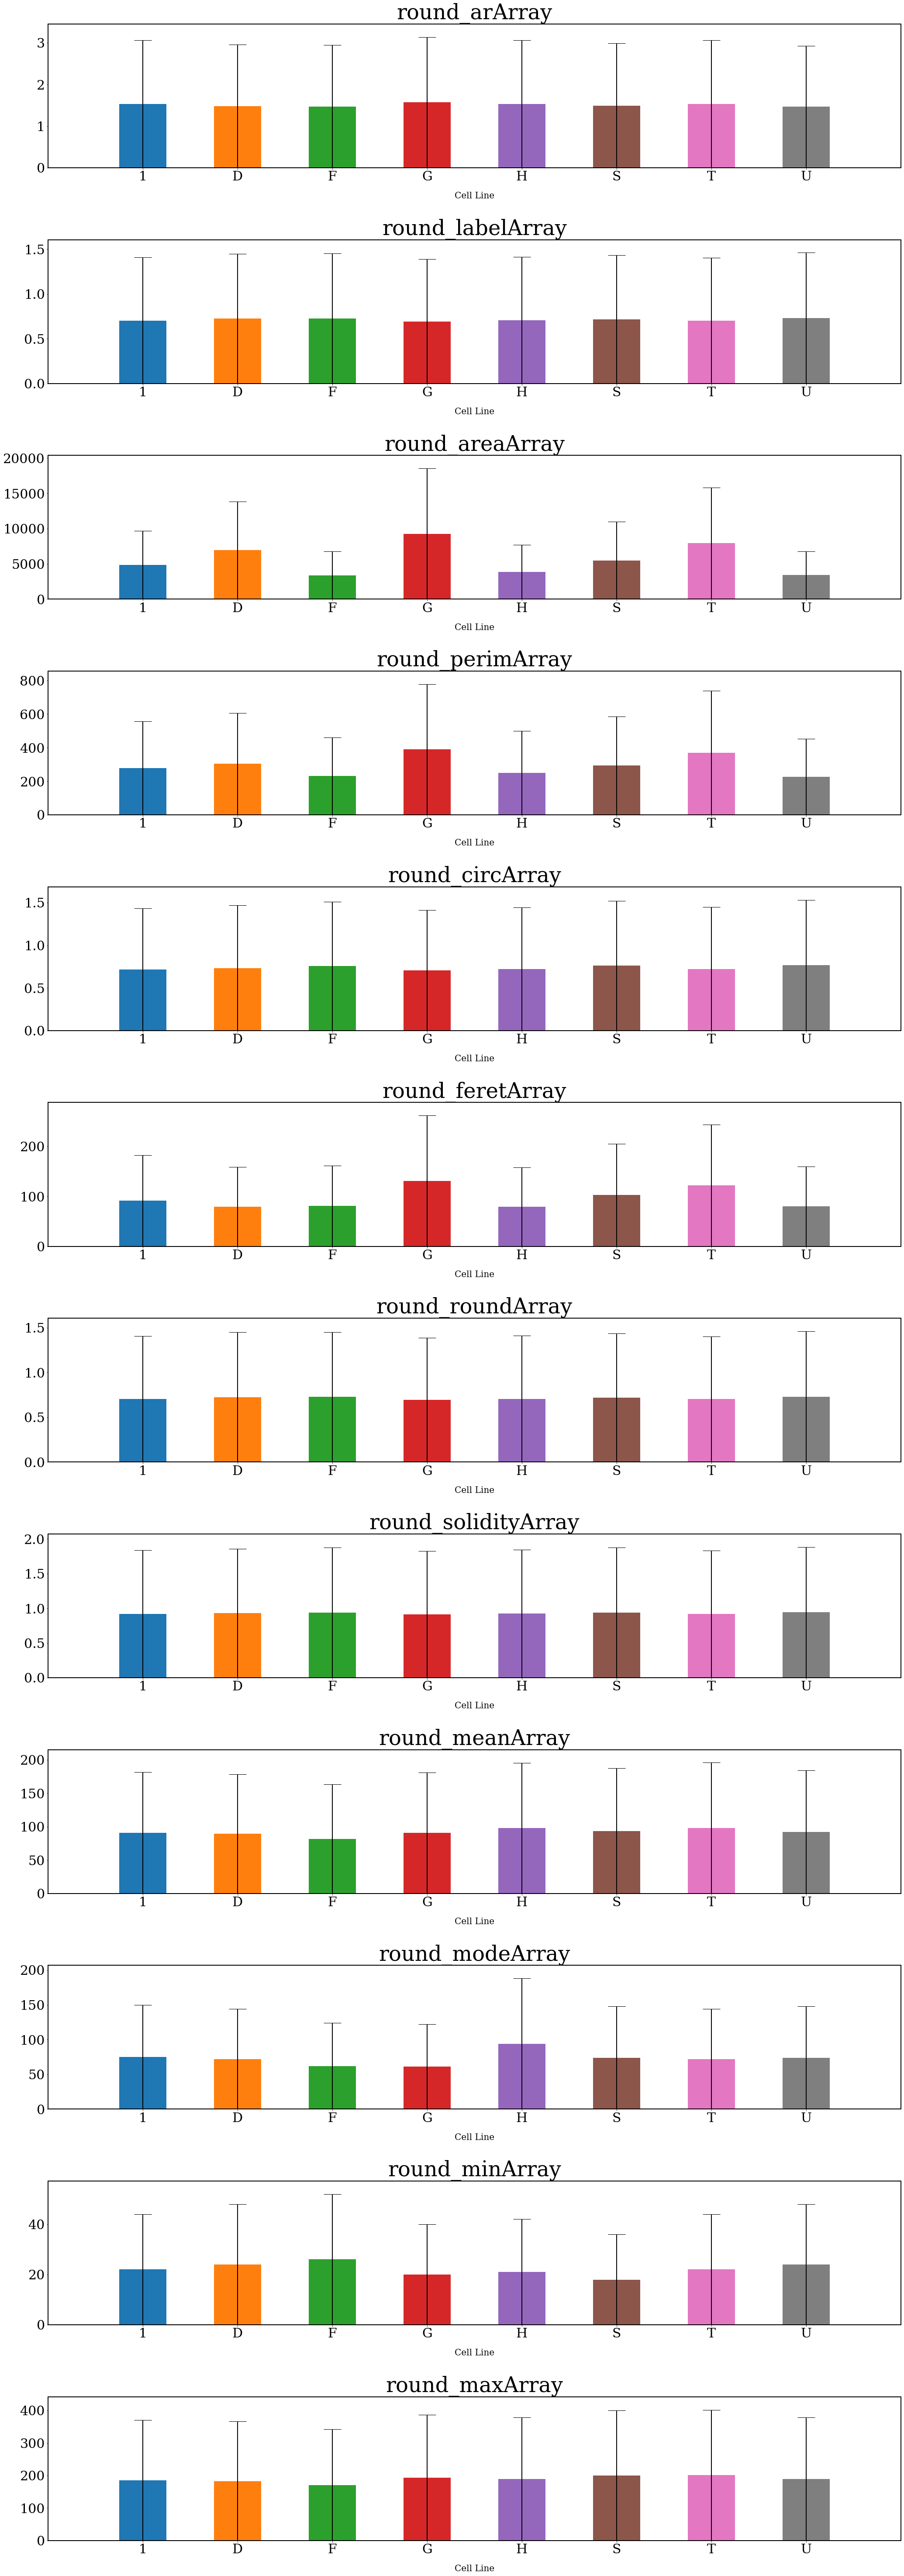

In [54]:
# more professional plots
plt.rcParams.update({'xtick.labelsize': 30})
plt.rcParams.update({'ytick.labelsize': 30})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'axes.linewidth': 2.0})
plt.rcParams.update({'axes.labelpad': 20.0})
plt.rcParams.update({'axes.xmargin': 0.1})
plt.rcParams.update({'axes.ymargin': 0.1})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'errorbar.capsize': 20})


# Creats plot of subplots:
labels = ['1', 'D', 'F', 'G', 'H', 'S', 'T', 'U']
fig, axs = plt.subplots(len(names), figsize = (35,100))

for i in range(12):
    x = np.arange(len(labels))
    for j in range(8): 
        plt.rcParams.update({'font.size': 40})
        axs[i].set_title(names[i])
        plt.rcParams.update({'font.size': 25})
        axs[i].set_xlabel("Cell Line")
        plt.rcParams.update({'font.size': 20})
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(labels)
        axs[i].bar(x[j], aggregates[j][i], yerr = saggregates[j][i], width=0.5, bottom = 0, align='center')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.show()